# Proyecto Final Procesamiento Digital de Señales.

Elaborado por: Jose David Ortiz Miranda

Ingenieria de Telecomumicaciones

Universidad de Antioquia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from scipy.io import wavfile
from scipy.signal import hilbert
from IPython.display import Audio # para escuchar la senal
from IPython.display import Audio #Libreria para escuchar audio

## 2. Aplicacion de Transformada de Hilbert a señales de audio.

### 2.1 Grafica de cada una de las señales de audio en el tiempo.

### - Audio 1.

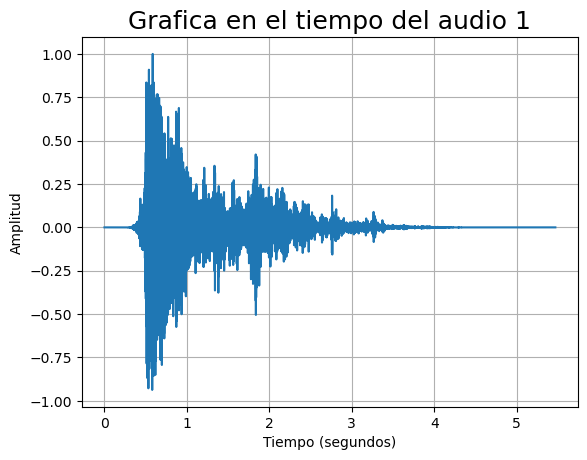

La frecuencia de este caso es:  8000


In [2]:
file_audio=('Trueno.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
x = x / np.max(np.abs(x)) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo
plt.plot(t,x) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 1",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(x, rate=fs) # para escuchar la senal

### - Audio 2.

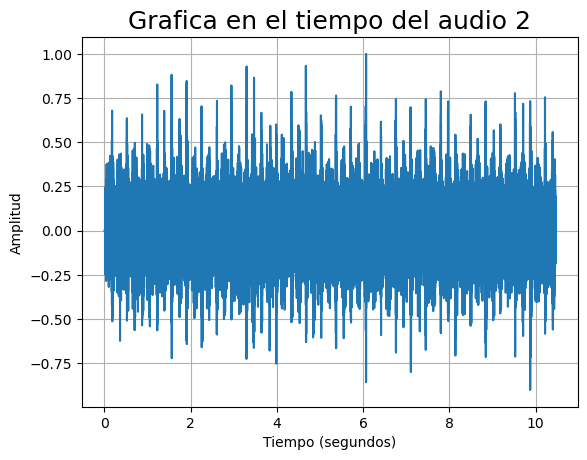

La frecuencia de este caso es:  8000


In [3]:
file_audio_1=('prensa_industrial.wav') # Ruta del archivo con la senal
fs, y=read(file_audio_1) # Cargar el archivo
y = y / np.max(np.abs(y)) # escala la amplitud de la senal
t=np.arange(0, float(len(y))/fs, 1.0/fs) # Vector de tiempo
plt.plot(t,y) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 2",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(y, rate=fs) # para escuchar la senal

### - Audio 3.

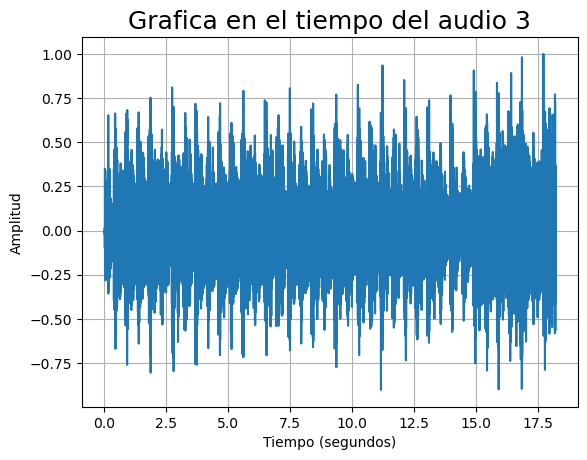

La frecuencia de este caso es:  8000


In [4]:
file_audio_2=('Blue_Cancion.wav') # Ruta del archivo con la senal
fs, z=read(file_audio_2) # Cargar el archivo
z = z / np.max(np.abs(z)) # escala la amplitud de la senal
t=np.arange(0, float(len(z))/fs, 1.0/fs) # Vector de tiempo
plt.plot(t,z) # Dibujar la grafica
plt.grid()

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.title("Grafica en el tiempo del audio 3",fontsize = 18)
plt.xlabel('Tiempo (segundos)') # Etiqueta eje X
plt.ylabel('Amplitud') # Etiqueta eje Y
plt.show() # Mostrar la grafica
print("La frecuencia de este caso es: ",fs)
Audio(z, rate=fs) # para escuchar la senal

### 2.2 Apliquele la transformada de Hilbert a cada audio.

### - Audio 1

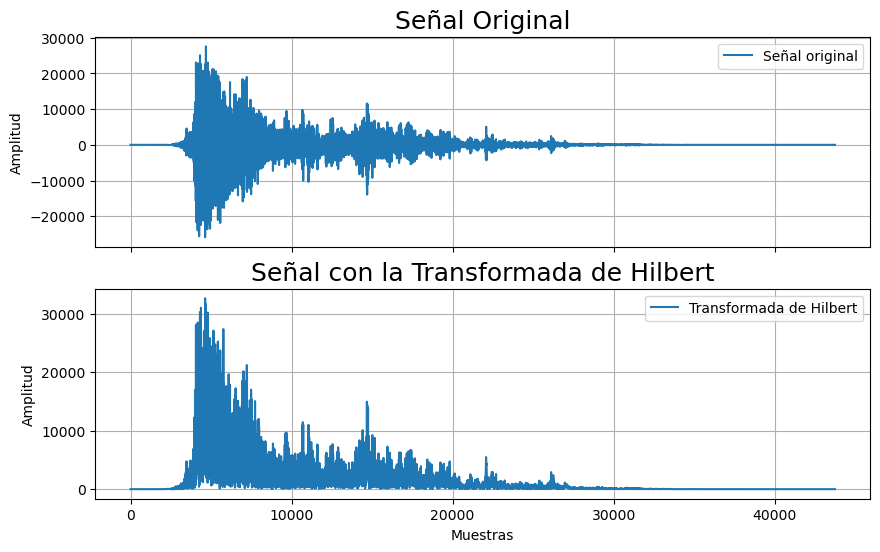

In [5]:
# Cargar el archivo de audio
fs, audio = wavfile.read('Trueno.wav')

# Calcular la transformada discreta de Hilbert
hilbert_transform = hilbert(audio)

# Visualizar la señal original y la transformada de Hilbert
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
ax1.plot(audio, label='Señal original')
ax1.set_ylabel('Amplitud')
ax1.set_title("Señal Original",fontsize = 18)
ax1.grid()
ax1.legend()

ax2.plot(np.abs(hilbert_transform), label='Transformada de Hilbert')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud')
ax2.set_title("Señal con la Transformada de Hilbert",fontsize=18)
ax2.grid()
ax2.legend()

plt.show()


In [6]:
Audio(hilbert_transform, rate=fs) # para escuchar la senal

C:\Users\Admin\anaconda3\lib\site-packages\IPython\lib\display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


### - Audio 2

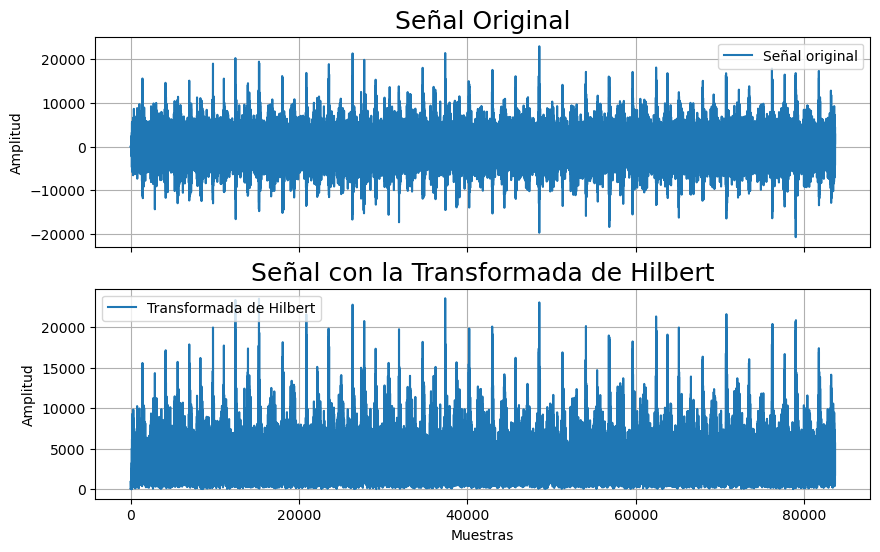

In [7]:
# Cargar el archivo de audio
fs, audio_1 = wavfile.read('prensa_industrial.wav')

# Calcular la transformada discreta de Hilbert
hilbert_transform_1 = hilbert(audio_1)

# Visualizar la señal original y la transformada de Hilbert
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
ax1.plot(audio_1, label='Señal original')
ax1.set_ylabel('Amplitud')
ax1.set_title("Señal Original",fontsize = 18)
ax1.grid()
ax1.legend()

ax2.plot(np.abs(hilbert_transform_1), label='Transformada de Hilbert')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud')
ax2.set_title("Señal con la Transformada de Hilbert",fontsize=18)
ax2.grid()
ax2.legend()

plt.show()

In [8]:
Audio(hilbert_transform_1, rate=fs) # para escuchar la senal

### - Audio 3

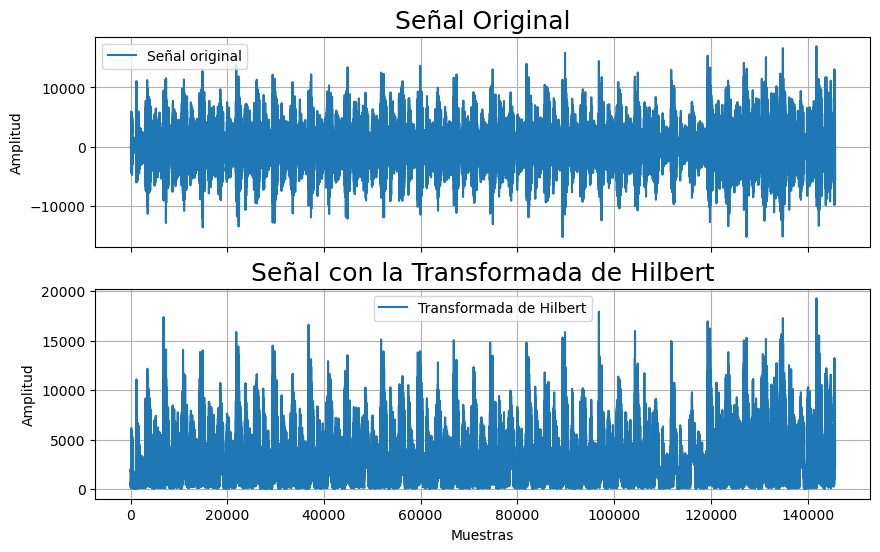

In [9]:
# Cargar el archivo de audio
fs, audio_2 = wavfile.read('Blue_Cancion.wav')

# Calcular la transformada discreta de Hilbert
hilbert_transform_2 = hilbert(audio_2)

# Visualizar la señal original y la transformada de Hilbert
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
ax1.plot(audio_2, label='Señal original')
ax1.set_ylabel('Amplitud')
ax1.set_title("Señal Original",fontsize = 18)
ax1.grid()
ax1.legend()

ax2.plot(np.abs(hilbert_transform_2), label='Transformada de Hilbert')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Amplitud')
ax2.set_title("Señal con la Transformada de Hilbert",fontsize=18)
ax2.grid()
ax2.legend()

plt.show()

In [10]:
Audio(hilbert_transform_2, rate=fs) # para escuchar la senal